<a href="https://colab.research.google.com/github/HussainBadreddeen/AutoML_Thesis/blob/main/hard_dataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries needed and importing the dataset from google drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
# from google.colab import drive
# drive.mount('/content/drive')


file_path = "/content/drive/MyDrive/thesisdata/balanced-reviews.txt"

# Load as a DataFrame (change delimiter if needed)
df = pd.read_csv(file_path, sep="\t", encoding="utf-16")




## I follow the CRISP-DM process here.
I've already done business understanding since I've mentioned the goal and objectives of this project is to compare AutoML for arabic sentiment analysis with manual tuning of hyperparameters

## **Data Understanding**

In [ ]:
#first few rows
print(df.head())
print("----------------------------")
print()
#Number of Rows and coloumns
print('Number of rows and columns in the data set:', df.shape)
print("----------------------------")
print()
#Data types of the dataset
df.info()
print("----------------------------")
print()

# Display summary statistics for numerical features
print(df.describe())
print("----------------------------")
print()
#quick check if there are any missing values
print("Missing Values:")
print(df.isnull().sum())
print("----------------------------")
print()

   no Hotel name  rating    user type                   room type  \
0   2    فندق 72       2  مسافر منفرد  غرفة ديلوكس مزدوجة أو توأم   
1   3    فندق 72       5          زوج  غرفة ديلوكس مزدوجة أو توأم   
2  16    فندق 72       5          زوج                           -   
3  20    فندق 72       1          زوج          غرفة قياسية مزدوجة   
4  23    فندق 72       4          زوج  غرفة ديلوكس مزدوجة أو توأم   

            nights                                             review  
0  أقمت ليلة واحدة                  “ممتاز”. النظافة والطاقم متعاون.   
1  أقمت ليلة واحدة  استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...  
2      أقمت ليلتين  استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...  
3  أقمت ليلة واحدة  “استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...  
4      أقمت ليلتين  جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...  
----------------------------

Number of rows and columns in the data set: (105698, 7)
----------------------------

<class 'pandas.core.frame.DataFrame'>

##since we know that we are trying to measure sentiment we focus on data related to reviews and their ratings

Amount of Values in the column: 105698
----------------------------
Number of unique ratings: 4
The unique values are:  [2 5 1 4]
----------------------------
Count of 'rating one': 14382                    Percentage of Total= 13.606690760468505 %
----------------------------
Count of 'rating two': 38467                    Percentage of Total= 36.3933092395315 %
----------------------------
Count of 'rating four': 26450                    Percentage of Total= 25.024125338227783 %
----------------------------
Count of 'rating five': 26399                    Percentage of Total= 24.975874661772217 %
----------------------------


<Axes: xlabel='rating', ylabel='count'>

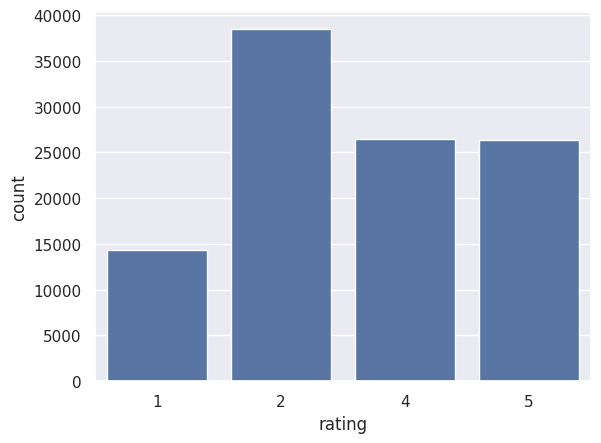

In [ ]:
#Checking How many values are Unqiue from the total values for the Column rating
print("Amount of Values in the column:", df["rating"].count())
print("----------------------------")
unique_ratings = df['rating'].nunique()
print(f"Number of unique ratings: {unique_ratings}")
print("The unique values are: " ,df['rating'].unique())
#1,2,4,5 are the unique values as they represent either negative (1,2) or positive (4,5). 3 was removed in the balanced version of the dataset
print("----------------------------")

count_of_rating_1 = (df['rating'] == 1).sum()
print("Count of 'rating one':", count_of_rating_1, "                   Percentage of Total=", count_of_rating_1/df["rating"].count()*100,"%")
print("----------------------------")

count_of_rating_2 = (df['rating'] == 2).sum()
print("Count of 'rating two':", count_of_rating_2, "                   Percentage of Total=", count_of_rating_2/df["rating"].count()*100,"%")
print("----------------------------")

count_of_rating_4 = (df['rating'] == 4).sum()
print("Count of 'rating four':", count_of_rating_4, "                   Percentage of Total=", count_of_rating_4/df["rating"].count()*100,"%")
print("----------------------------")

count_of_rating_5 = (df['rating'] == 5).sum()
print("Count of 'rating five':", count_of_rating_5, "                   Percentage of Total=", count_of_rating_5/df["rating"].count()*100,"%")
print("----------------------------")

#We can plot the number of ratings for each in a small graph here
sns.countplot(x = 'rating', data = df)
#(1-2)= negative
#(4-5)= positive

## We group ratings (1-2) and (4,5) to show total count of negative and positive sentiment respectively

Count of 'negative sentiment': 52849                    Percentage of Total= 50.0 %
Count of 'positive sentiment': 52849                    Percentage of Total= 50.0 %


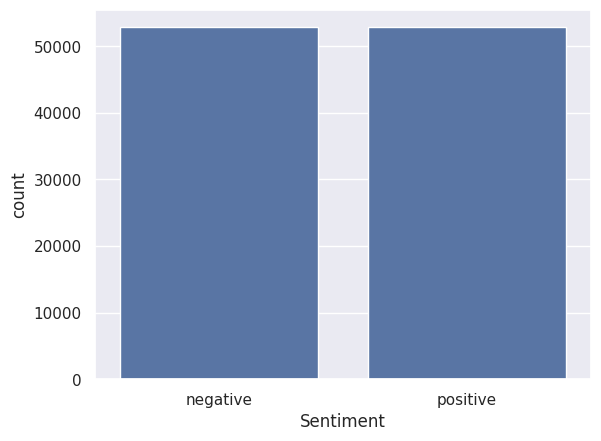

In [ ]:
#we create a new data frame called sentiment to have only positive and negative classes so we can compare safely without skewing the original data set
df['Sentiment'] = df['rating'].apply(lambda rating : 'negative' if rating < 4 else 'positive')

#we then plot the total count of each sentiment
sns.countplot(x = 'Sentiment', data = df)

negative_sentiment = (df['Sentiment'] == 'negative').sum()
print("Count of 'negative sentiment':", negative_sentiment, "                   Percentage of Total=", negative_sentiment/df["Sentiment"].count()*100,"%")

positive_sentiment = (df['Sentiment'] == 'positive').sum()
print("Count of 'positive sentiment':", positive_sentiment, "                   Percentage of Total=", positive_sentiment/df["Sentiment"].count()*100,"%")

#Data set appears to be prefectly balanced

##since we've covered the ratings we move on to the reviews

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 6.0 MB/s eta 0:00:00
count                     105698
unique                    104036
top       استثنائي. كل شي. لا شي
freq                          62
Name: review, dtype: object

Sample Reviews:
 49518    مخيب للأمل. لا يوجد. لا يوجد تجوب سريع في الخد...
83893       “السعودية صفوى”. لاشي. كل شي الا النت والتي في
21951    ضعيف. قرب الفندق لمول الإمارات. الغرف غير نظيف...
41612    “لا يوجد ماء”. . لا يوجد ماءNo water for three...
31641    استثنائي. السرير ممتاز النظافه. بعد حوض السباح...
Name: review, dtype: object
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.4 MB/s eta 0:00:00
Reviews with English: 2711
Reviews with Emojis: 752
Reviews with Both English & Emojis: 35

Sample Reviews with English:
['“اسوأ فندق يمكن ان تعيش فيه”. . الافطار-العماله والموظفين-النظافه-ريموت التلفزيون لا يعمل ولم يتم تغييره-الفوط بالحمامtowel قديمه و ممزق اجزاء منها ومعي صورتها.', '“فندق سويس اوتيل مكة ١٢-٣-٢٠١٦ -- الجمعة”. الفندق ن

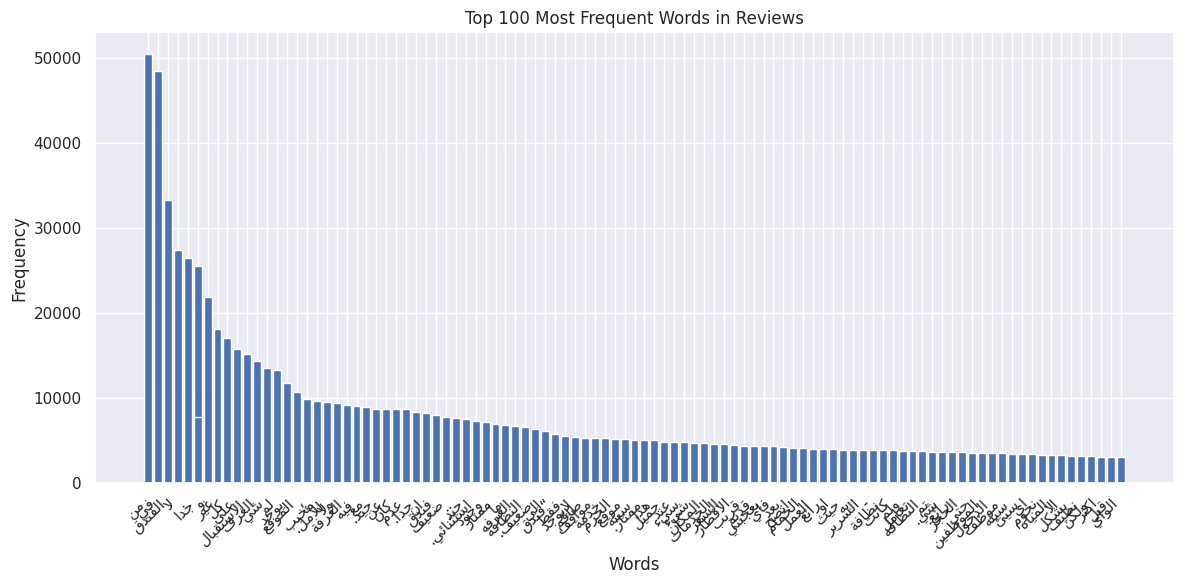

In [ ]:
!pip install arabic-reshaper
!pip install python-bidi

from collections import Counter
from arabic_reshaper import reshape
from bidi.algorithm import get_display

# Inspect the review column
print(df['review'].describe())  # Basic statistics (count, unique, top, freq)
print("\nSample Reviews:\n", df['review'].sample(5))  # Print random 5 reviews



!pip install emoji
import re
import emoji

# Function to check if a review contains English letters
def contains_english(text):
    return bool(re.search(r'[a-zA-Z]', text))

# Function to check if a review contains emojis
def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in text)

# Apply functions to create new columns
df["has_english"] = df["review"].apply(contains_english)
df["has_emoji"] = df["review"].apply(contains_emoji)

# Check if a review has both English & emoji
df["has_both"] = df["has_english"] & df["has_emoji"]

num_english = df["has_english"].sum()
num_emoji = df["has_emoji"].sum()
num_both = df["has_both"].sum()

print(f"Reviews with English: {num_english}")
print(f"Reviews with Emojis: {num_emoji}")
print(f"Reviews with Both English & Emojis: {num_both}")


print("\nSample Reviews with English:")
print(df[df["has_english"]]["review"].sample(5).tolist())

print("\nSample Reviews with Emojis:")
print(df[df["has_emoji"]]["review"].sample(5).tolist())

print("\nSample Reviews with Both English & Emojis:")
print(df[df["has_both"]]["review"].sample(5).tolist())





# Combine all reviews into a single string
all_reviews = ' '.join(df['review'].astype(str))

# Tokenization (splitting into words)
words = all_reviews.split()

# Count word frequencies
word_counts = Counter(words)

# Get the top 100 most frequent words
top_100_words = word_counts.most_common(100)

# Prepare Arabic words for visualization
words, counts = zip(*top_100_words)
reshaped_words = [reshape(word) for word in words]
display_words = [get_display(word) for word in reshaped_words]

# Plot word frequencies
plt.figure(figsize=(12, 6))
plt.bar(display_words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 100 Most Frequent Words in Reviews")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()





since we've inspected our main 2 attributes rating and review. we move on to data preperation where we drop other columns and start preprocessing the reviews

##**Data preperation**

In [ ]:
df_copy = df[['rating', 'review']].copy()

##to better see reviews
pd.set_option('display.max_colwidth', None)  # Prevents text shrinking
pd.set_option('display.width', 1000)  # Adjusts display width


df_copy.head()

,rating,review
0,2,“ممتاز”. النظافة والطاقم متعاون.
1,5,استثنائي. سهولة إنهاء المعاملة في الاستقبال. لاشيئ
2,5,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه رقم 801. نوعية الارضيه
3,1,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق 2 نجمه
4,4,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كان حوض السباحه لايعمل في هذي الفتره حسب كلامهم يقولوا فيه صيانه والله اعلم


##We start with Normalizing the arabic text

since english represents only 2.56% we keep it as is bec. tf-idf and automl tools can still
recognise it without bias
emojis are converted because they hold sentiment

In [ ]:
#To normalize arabic text we need to removing diacritics (tashkeel), removing elongation of words (tatweel) converting variations of the same certain letter to a standard unified form
#couldnt use farasa so opted for camel tools

# !pip install farasa # cant normalise with it :( docs arent available and cant sign up
!pip install camel-tools
import re
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.dediac import dediac_ar


punctuation_pattern = re.compile(r"[-،؟.!\"':;(){}“”‘’,.&+\^\*\%@#/~=_\[\]<>|\\\n\t]")# Remove Arabic & English punctuation
quotes_pattern = re.compile(r'[\"\'“”‘’]')  # Matches only quotation marks (Arabic & English)


def remove_elongation(text):
    # Rule 1: Remove if a letter is repeated 3+ times anywhere
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Rule 2: Remove if a letter is repeated 2+ times at the end of the word
    text = re.sub(r'(\w)\1$', r'\1', text)

    return text


# Dictionary to store emoji conversions
emoji_conversion_log = {}

def convert_emojis_to_arabic(text):
    converted_text = emoji.demojize(text, language='ar')  # 😍 → ":وجه_بعيون_على_شكل_قلوب:"
    converted_text_cleaned = converted_text.replace(":", "").replace("_", " ")  # :"وجه بعيون على شكل قلوب"

    # Log changes if an emoji was actually converted
    if text != converted_text:
        emoji_conversion_log[text] = converted_text_cleaned

    return converted_text_cleaned


def preprocess_text(text):
    text = normalize_unicode(text)  # Step 1: Normalize Unicode
    text = remove_elongation(text)  # Step 2: Remove elongation ## removes momtaz and other normal arabic words a workaround could be 3+ letters but will try to find a library first. update: didnt find but this seems to be working fine
    text = re.sub(r'[٠-٩]', lambda x: str(ord(x.group()) - ord('٠')), text)  # Step 3: Convert Arabic numbers to English
    text = convert_emojis_to_arabic(text)
    text = re.sub(r'\d+', '', text)  # Step 4: Remove all numbers ##for now i wont reemove cause ## update i will remove and test
    text = quotes_pattern.sub('', text)  # Step 5: Remove quotation marks (but keep text inside)
    text = dediac_ar(text)  # Step 6: Remove diacritics
    text = normalize_alef_maksura_ar(text)  # Step 7: Normalize ى → ي
    text = normalize_teh_marbuta_ar(text)  # Step 8: Normalize ة → ه
    text = normalize_alef_ar(text) # step 9  Normalize alef variants to 'ا'
    text = punctuation_pattern.sub('', text)  # Step 10: Remove punctuation
    # text = re.sub(r'(?<!\w)و(?=\w)', r'و ', text)  # Add space after و only if it's at the start
    # text = re.sub(r'(?<=\w)و(?!\w)', r' و', text)  # Add space before و only if it's at the end # Ensure "و" is separated only when it's at the beginning of a word
    text = re.sub(r'\s+', ' ', text).strip()

    return text


print()
print("Before camel tools and manual normalization")
print(df_copy['review'].head(20))
print("----------------------------")
print()

#Normalization applied to entire DataFrame
df['normalized_review'] = df['review'].astype(str).apply(preprocess_text)


# Function to check if text still contains emojis
def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in text)

#Check for emojis in the normalized reviews
df["has_emoji"] = df["normalized_review"].apply(contains_emoji)

#num of reviews with emojis
num_reviews_with_emojis = df["has_emoji"].sum()
print(f"\n Num of reviews containing emojis AFTER normalization: {num_reviews_with_emojis}")


#sample of emoji conversions
print("\n sample of Emoji Conversions (First 10)")
for original, converted in list(emoji_conversion_log.items())[:10]:
    print(f"{original} → {converted}")

print("After camel tools and manual normalization")
print(df['normalized_review'].head(20))
print("----------------------------")
print()

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 18.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

## After normalizing text we do Tokenization

In [ ]:
from camel_tools.tokenizers.word import simple_word_tokenize

# Tokenize the normalized reviews
df['tokens'] = df['normalized_review'].apply(lambda x: simple_word_tokenize(x))

# Display the first few rows to verify tokenization
print(df[['normalized_review', 'tokens']].head(20))


                                                                                                                                                                                              normalized_review                                                                                                                                                                                                                                         tokens
0                                                                                                                                                                                  ممتاز النظافه والطاقم متعاون                                                                                                                                                                                                              [ممتاز, النظافه, والطاقم, متعاون]
1                                                                                                         

## **We then remove stop words**

In [ ]:
# ✅ Mount Google Drive for accessing stopwords file
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter

#eng stop wrods
nltk.download("stopwords")

#loading
nltk_stopwords = set(stopwords.words("english"))

# loading the arabic stopwords customized list
stopwords_file_path = "/content/drive/MyDrive/thesisdata/updated_stopwords.txt"
custom_stopwords = set(pd.read_csv(stopwords_file_path, header=None, encoding="utf-8")[0].tolist())

# combing both stopwords lists
all_stopwords = nltk_stopwords.union(custom_stopwords)

# applying stopwords removal from normalized tezxt
df["filtered_tokens"] = df["tokens"].apply(lambda tokens: [word for word in tokens if word.lower() not in all_stopwords])

#Counting removed stopwords
removed_words = []
for original, filtered in zip(df["tokens"], df["filtered_tokens"]):
    removed_words.extend([word for word in original if word.lower() in all_stopwords])

removed_counts = Counter(removed_words)

#showing top 200 most removed words
print("Most removed stopwords:", removed_counts.most_common(200))

# ✅ Display sample results # chatgpt
print("Tokens before filtering stopwords:\n", df["tokens"].head(10))
print("\nTokens after filtering stopwords:\n", df["filtered_tokens"].head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most removed stopwords: [('من', 51190), ('في', 49831), ('علي', 18083), ('فيه', 11154), ('ان', 10770), ('الي', 10499), ('عن', 8779), ('به', 5384), ('او', 5073), ('عند', 4893), ('اي', 4448), ('بعد', 4371), ('حيث', 3977), ('تم', 3782), ('انه', 3664), ('بشكل', 3286), ('قبل', 3163), ('بعض', 3043), ('جميع', 2967), ('فيها', 2880), ('التي', 2265), ('احد', 2169), ('بسبب', 2003), ('بها', 1840), ('الذي', 1769), ('اذا', 1600), ('عام', 1575), ('عليه', 1529), ('درهم', 1364), ('ايضا', 1332), ('اول', 1298), ('خمس', 1289), ('بين', 1279), ('ع', 1208), ('بان', 1137), ('اليوم', 1073), ('ب', 1022), ('تكون', 995), ('ايام', 906), ('بهذا', 894), ('انها', 878), ('ف', 868), ('ثلاث', 865), ('الوقت', 824), ('the', 807), ('امام', 787), ('عندما', 768), ('تحت', 763), ('خلال', 721), ('خارج', 717), ('عدد', 681), ('عليك', 666), ('بل', 665), ('فوق', 656), ('عليها', 651), ('اما', 644), ('اليه', 643), ('قال', 592), ('صباحا', 586), ('الثاني', 585), ('سوف', 558), ('ثم', 555), ('حسب', 545), ('and', 512), ('الان', 506), ('الا

##After tokenization and removing stop words we whould now have a cleaned dataset. we can now proceed with lemmatization to bring words back to their root form.

#we try different tools:

#1-stranza by stanford:

In [ ]:
!pip install stanza
import stanza
import pandas as pd
from collections import Counter
from camel_tools.utils.dediac import dediac_ar  # from camel tools before fa msh ha install again

# ✅ Load Stanza NLP Pipeline for Arabic (only necessary processors)
stanza.download("ar")
nlp = stanza.Pipeline("ar", processors="tokenize,lemma")

def lemmatize_arabic(text):
    """Lemmatizes Arabic text using Stanza and removes diacritics."""
    try:
        doc = nlp(text)
        lemmas = [word.lemma for sent in doc.sentences for word in sent.words]
        return [dediac_ar(lemma) for lemma in lemmas]  # ✅ Remove diacritics
    except Exception as e:
        print(f"⚠️ Stanza Lemmatization Failed: {e}")
        return []

df["stanza_lemmatized"] = df["filtered_tokens"].apply(lambda tokens: lemmatize_arabic(" ".join(tokens)))

# ✅ Compute Evaluation Metrics
def evaluate_lemmatization(original_tokens, lemmatized_tokens):
    unique_original = set(original_tokens)
    unique_stemmed = set(lemmatized_tokens)

    if len(unique_original) == 0:  # Prevent ZeroDivisionError
        return 0.0, 0.0

    changed_words = sum(1 for o, s in zip(original_tokens, lemmatized_tokens) if o != s)
    inconsistent_words = sum(1 for word, count in Counter(lemmatized_tokens).items() if count > 1)

    reduction_rate = ((len(unique_original) - len(unique_stemmed)) / len(unique_original)) * 100
    consistency_score = (inconsistent_words / len(original_tokens)) * 100 if original_tokens else 0.0

    return reduction_rate, consistency_score

# ✅ Apply Evaluation
df["reduction_rate"], df["consistency_score"] = zip(*df.apply(
    lambda row: evaluate_lemmatization(row["filtered_tokens"], row["stanza_lemmatized"]), axis=1
))

# 🔍 Display Final Summary Results
print("📊 Final Results 📊")
print(f"✅ Average Reduction Rate: {df['reduction_rate'].mean():.2f}%")
print(f"✅ Average Consistency Score: {df['consistency_score'].mean():.2f}%")


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ar (Arabic) ...
INFO:stanza:File exists: /root/stanza_resources/ar/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| lemma     | padt_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


📊 Final Results 📊
✅ Average Reduction Rate: -13.31%
✅ Average Consistency Score: 12.62%


#we try different approaches including
##2-Tashphyne and 3-Khoja stemmer

In [ ]:
import pandas as pd
from collections import Counter
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

# ✅ Initialize Stemmer Objects
tashaphyne_stemmer = ArabicLightStemmer()
khoja_stemmer = ISRIStemmer()

def tashaphyne_stem(tokens):
    """Applies Tashaphyne light stemming to tokens."""
    return [tashaphyne_stemmer.light_stem(token) for token in tokens]

def khoja_stem(tokens):
    """Applies Khoja stemming to tokens."""
    return [khoja_stemmer.stem(token) for token in tokens]

# ✅ Apply Stemming
df["tashaphyne_stemmed"] = df["filtered_tokens"].apply(tashaphyne_stem)
df["khoja_stemmed"] = df["filtered_tokens"].apply(khoja_stem)

def evaluate_stemming(original_tokens, stemmed_tokens):
    """Evaluates stemming performance by comparing original and stemmed tokens."""
    unique_original = set(original_tokens)
    unique_stemmed = set(stemmed_tokens)

    if not unique_original:  # Prevent division by zero
        return 0.0, 0.0, []

    changed_words = {o: s for o, s in zip(original_tokens, stemmed_tokens) if o != s}
    reduction_rate = ((len(unique_original) - len(unique_stemmed)) / len(unique_original)) * 100
    consistency_score = sum(1 for word in unique_stemmed if stemmed_tokens.count(word) > 1) / len(original_tokens) * 100

    return reduction_rate, consistency_score, changed_words

# ✅ Apply Evaluation
df["tashaphyne_reduction_rate"], df["tashaphyne_consistency_score"], df["tashaphyne_changed_words"] = zip(*df.apply(
    lambda row: evaluate_stemming(row["filtered_tokens"], row["tashaphyne_stemmed"]), axis=1
))

df["khoja_reduction_rate"], df["khoja_consistency_score"], df["khoja_changed_words"] = zip(*df.apply(
    lambda row: evaluate_stemming(row["filtered_tokens"], row["khoja_stemmed"]), axis=1
))

# 🔍 Display Final Summary Results
print("📊 Final Results 📊")
print(f"✅ Tashaphyne - Avg Reduction Rate: {df['tashaphyne_reduction_rate'].mean():.2f}%")
print(f"✅ Tashaphyne - Avg Consistency Score: {df['tashaphyne_consistency_score'].mean():.2f}%")
print(f"🔍 Most Changed Words (Tashaphyne): {dict(Counter(df['tashaphyne_changed_words'].sum()).most_common(10))}\n")

print(f"✅ Khoja - Avg Reduction Rate: {df['khoja_reduction_rate'].mean():.2f}%")
print(f"✅ Khoja - Avg Consistency Score: {df['khoja_consistency_score'].mean():.2f}%")
print(f"🔍 Most Changed Words (Khoja): {dict(Counter(df['khoja_changed_words'].sum()).most_common(10))}\n")


📊 Final Results 📊
✅ Tashaphyne - Avg Reduction Rate: 2.32%
✅ Tashaphyne - Avg Consistency Score: 6.33%


TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

##more testing
##4-Isri 5-snowball both NLTK

In [ ]:
import pandas as pd
import random
from collections import Counter
from nltk.stem.isri import ISRIStemmer
from nltk.stem.snowball import ArabicStemmer

# ✅ Initialize Stemmers
try:
    isri_stemmer = ISRIStemmer()
    snowball_stemmer = ArabicStemmer()
    stemmers_available = True
except Exception as e:
    print(f"⚠️ Stemmer Initialization Failed: {e}")
    stemmers_available = False

# ✅ Function to Apply Stemming

def apply_stemming(tokens, stemmer, stemmer_name):
    try:
        return [stemmer.stem(word) for word in tokens]
    except Exception as e:
        print(f"⚠️ {stemmer_name} Stemming Error: {e}")
        return tokens  # Return original tokens if error occurs

if stemmers_available:
    df["isri_stemmed_tokens"] = df["filtered_tokens"].apply(lambda tokens: apply_stemming(tokens, isri_stemmer, "ISRI"))
    df["snowball_stemmed_tokens"] = df["filtered_tokens"].apply(lambda tokens: apply_stemming(tokens, snowball_stemmer, "Snowball"))

# ✅ Function to Evaluate Stemming Effectiveness
def evaluate_stemming(df, original_column, stemmed_column, stemmer_name):
    original_tokens = df[original_column].explode().dropna()
    stemmed_tokens = df[stemmed_column].explode().dropna()

    unique_original = set(original_tokens)
    unique_stemmed = set(stemmed_tokens)

    print(f"🔹 {stemmer_name} Stemmer Evaluation 🔹")
    print(f"📌 Unique Words Before: {len(unique_original)}")
    print(f"📌 Unique Words After Stemming: {len(unique_stemmed)}")

    # 🔍 Count How Many Words Changed
    changed_words = [o for o, s in zip(original_tokens, stemmed_tokens) if o != s]
    print(f"🔍 Words That Changed: {len(set(changed_words))} / {len(unique_original)} ({(len(set(changed_words)) / len(unique_original)) * 100:.2f}%)")

    # ⚠️ Check for Inconsistencies (same word, different stems)
    stem_counts = Counter(stemmed_tokens)
    inconsistent_words = {word for word, count in stem_counts.items() if count > 1}
    print(f"⚠️ Inconsistently Stemmed Words: {len(inconsistent_words)}\n")

    return changed_words, inconsistent_words

# ✅ Run Evaluation for Both Stemmers
if stemmers_available:
    changed_isri, inconsistent_isri = evaluate_stemming(df, "filtered_tokens", "isri_stemmed_tokens", "ISRI")
    changed_snowball, inconsistent_snowball = evaluate_stemming(df, "filtered_tokens", "snowball_stemmed_tokens", "Snowball")

    # ✅ Show Random 5 Samples Before & After Stemming
    samples = random.sample(range(len(df)), min(5, len(df)))  # Avoids sampling error if df has < 5 rows
    print("🔍 Sample Stemming Comparison 🔍\n")
    for i in samples:
        print(f"🔵 Original: {df['filtered_tokens'].iloc[i]}")
        print(f"🟢 ISRI Stemmed: {df['isri_stemmed_tokens'].iloc[i]}")
        print(f"🟣 Snowball Stemmed: {df['snowball_stemmed_tokens'].iloc[i]}")
        print("-" * 100)


##Trying 5-farasa again :( and 6- Camel tools again :(

In [ ]:
import pandas as pd
import random
from collections import Counter

# ✅ Install required libraries
!pip install farasapy transformers torch

# ✅ Import Lemmatization & Stemming Libraries
from farasapy import FarasaStemmer
from camel_tools.lemmatization import Lemmatizer
from transformers import AutoModelForTokenClassification, AutoTokenizer, pipeline

# ✅ Initialize FarasaPy Stemmer (since lemmatization is unavailable) https://github.com/MagedSaeed/farasapy
try:
    farasa_stemmer = FarasaStemmer()
    farasa_available = True
except Exception as e:
    print(f"⚠️ FarasaPy (Stemming) initialization failed: {e}")
    farasa_available = False

# ✅ Initialize CAMeL Lemmatizer
try:
    camel_lemmatizer = Lemmatizer(model="default")
    camel_available = True
except Exception as e:
    print(f"⚠️ CAMeL initialization failed: {e}")
    camel_available = False

# ✅ Initialize AraBERT Lemmatization Pipeline
try:
    tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")
    model = AutoModelForTokenClassification.from_pretrained("aubmindlab/bert-base-arabertv02")
    nlp_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)
    arabert_available = True
except Exception as e:
    print(f"⚠️ AraBERT initialization failed: {e}")
    arabert_available = False

# ✅ Function to Apply AraBERT Lemmatization
def arabert_lemmatize(tokens):
    lemmas = []
    for token in tokens:
        try:
            result = nlp_pipeline(token)
            lemma = result[0]["word"] if result else token  # Fallback to original token
            lemmas.append(lemma)
        except Exception as e:
            print(f"⚠️ AraBERT error on token '{token}': {e}")
            lemmas.append(token)  # Keep original token if error occurs
    return lemmas

# ✅ Apply Lemmatization/Stemming with Error Handling
if farasa_available:
    try:
        df["farasa_stemmed"] = df["filtered_tokens"].apply(lambda tokens: [farasa_stemmer.stem(word) for word in tokens])
    except Exception as e:
        print(f"⚠️ FarasaPy Stemming failed: {e}")
        df["farasa_stemmed"] = df["filtered_tokens"]

if camel_available:
    try:
        df["camel_lemmatized"] = df["filtered_tokens"].apply(lambda tokens: [camel_lemmatizer.lemmatize(word)[0] for word in tokens])
    except Exception as e:
        print(f"⚠️ CAMeL Lemmatization failed: {e}")
        df["camel_lemmatized"] = df["filtered_tokens"]

if arabert_available:
    try:
        df["arabert_lemmatized"] = df["filtered_tokens"].apply(lambda tokens: arabert_lemmatize(tokens))
    except Exception as e:
        print(f"⚠️ AraBERT Lemmatization failed: {e}")
        df["arabert_lemmatized"] = df["filtered_tokens"]

# ✅ Function to Evaluate Lemmatization Effectiveness
def evaluate_lemmatization(df, original_column, lemmatized_column, method_name):
    original_tokens = df[original_column].explode().dropna()
    lemmatized_tokens = df[lemmatized_column].explode().dropna()

    # 📌 Count Unique Words Before & After
    unique_original = set(original_tokens)
    unique_lemmatized = set(lemmatized_tokens)

    print(f"🔹 {method_name} Evaluation 🔹")
    print(f"📌 Unique Words Before: {len(unique_original)}")
    print(f"📌 Unique Words After Processing: {len(unique_lemmatized)}")

    # 🔍 Count How Many Words Changed
    changed_words = [o for o, l in zip(original_tokens, lemmatized_tokens) if o != l]
    print(f"🔍 Words That Changed: {len(set(changed_words))} / {len(unique_original)} ({(len(set(changed_words)) / len(unique_original)) * 100:.2f}%)")

    # ⚠️ Check for Inconsistencies (same word, different results)
    lemma_counts = Counter(lemmatized_tokens)
    inconsistent_words = {word for word, count in lemma_counts.items() if count > 1}
    print(f"⚠️ Inconsistently Processed Words: {len(inconsistent_words)}\n")

    return changed_words, inconsistent_words

# ✅ Run Evaluation for Each Available Method
if farasa_available:
    changed_farasa, inconsistent_farasa = evaluate_lemmatization(df, "filtered_tokens", "farasa_stemmed", "FarasaPy (Stemming)")
if camel_available:
    changed_camel, inconsistent_camel = evaluate_lemmatization(df, "filtered_tokens", "camel_lemmatized", "CAMeL (Lemmatization)")
if arabert_available:
    changed_arabert, inconsistent_arabert = evaluate_lemmatization(df, "filtered_tokens", "arabert_lemmatized", "AraBERT (Lemmatization)")

# ✅ Show Random 5 Samples Before & After Processing
samples = random.sample(range(len(df)), 5)
print("🔍 Sample Comparison 🔍\n")
for i in samples:
    print(f"🔵 Original: {df['filtered_tokens'].iloc[i]}")
    if farasa_available:
        print(f"🟢 Farasa Stemmed: {df['farasa_stemmed'].iloc[i]}")
    if camel_available:
        print(f"🟣 CAMeL Lemmatized: {df['camel_lemmatized'].iloc[i]}")
    if arabert_available:
        print(f"🔴 AraBERT Lemmatized: {df['arabert_lemmatized'].iloc[i]}")
    print("-" * 100)


##After lemmatization we can now proceed to word embeddings so that ML models understand words. here we use **TF-IDF**

In [ ]:
# ✅ Convert tokenized words into a string for each review
df["filtered_text"] = df["filtered_tokens"].apply(lambda tokens: " ".join(tokens))

# ✅ Apply TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize TF-IDF Vectorizer (Limit to top 15000 words)
tfidf_vectorizer = TfidfVectorizer(max_features=15000)

# Transform text into TF-IDF representation
X_tfidf = tfidf_vectorizer.fit_transform(df["filtered_text"])

# Convert TF-IDF to DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# ✅ Merge TF-IDF features with ratings
df_tfidf_final = pd.concat([df[["rating"]], X_tfidf_df], axis=1)

# ✅ Save the dataset (for future use)
df_tfidf_final.to_csv("tfidf_with_ratings.csv", index=False, encoding="utf-16")
print("✅ TF-IDF dataset saved!")

# ✅ Download the dataset in Colab
from google.colab import files
files.download("tfidf_with_ratings.csv")
print("📥 TF-IDF dataset downloaded successfully!")

# ✅ Now use `df_tfidf_final` directly in this session without reloadin

##We now have our reviews in a numerical form and ready for modelling

In [ ]:
!pip install tpot

from sklearn.model_selection import train_test_split, cross_val_score
from tpot import TPOTClassifier
# import pickle
# import numpy as np
#both done already but left here for now

#Use the in-session TF-IDF dataset instead of reloading from a file
if "df_tfidf_final" not in globals():
    raise ValueError("ERROR: df_tfidf_final not found. Ensure it is created before running TPOT.")

# Check dataset structure and handle missing values
df_tfidf_final.dropna(inplace=True)  # Remove missing values if any
print(df_tfidf_final.info())

# Ensure correct data types
X = df_tfidf_final.drop(columns=["rating"]).astype(float)  # we drop rating from the reviews here
y = df_tfidf_final["rating"].astype(int)  # Ensure ratings are integers

# conv ratings into a binary classification (Positive = 1, Negative = 0) as mentioned earlier (1,2 negative and 4,5 are positive with no neutral)
y = y.apply(lambda x: 1 if x >= 4 else 0)

#correct shapes
print(f"Feature Matrix Shape: {X.shape}, Target Vector Shape: {y.shape}")

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # the norm
)
print(f"Training Size: {X_train.shape}, Testing Size: {X_test.shape}")

tpot = TPOTClassifier() #init of the tpot classifier with default settings which are the following:
# generations	100	            Number of iterations TPOT runs for optimization.
# population_size	100	        Number of pipelines in each generation.
# offspring_size	None        (same as population_size)	Number of new pipelines created per generation.
# mutation_rate	0.9	          Probability of mutation in the genetic algorithm.
# crossover_rate	0.1	        Probability of crossover (recombining pipelines).
# scoring	'accuracy'	        Evaluation metric (can be changed to precision, recall, etc.).
# cv	5	                      Default cross-validation strategy (5-fold CV).
# subsample	1.0	              Fraction of data used during optimization.
# n_jobs	1	                  Number of parallel jobs (-1 uses all CPU cores).
# max_time_mins	None	        No time limit by default.
# max_eval_time_mins	5	      Maximum time per pipeline evaluation (in minutes).
# early_stop	None	          No early stopping by default.
# config_dict	'TPOT sparse'	  Defines which models TPOT considers (e.g., classifiers, regressors).
# warm_start	False	          If True, TPOT continues training from previous state.
# memory	None	              Caching mechanism for pipelines.
# verbosity	0	                Controls logging level (0 = silent, 3 = detailed output).


# Train TPOT to find the best model
tpot.fit(X_train, y_train)

# Evaluate TPOT using cross-validation scores
cv_scores = cross_val_score(tpot.fitted_pipeline_, X_train, y_train, cv=5)
print(f"✅ Cross-validation Accuracy Scores: {cv_scores}")
print(f"✅ Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# Evaluate TPOT on test data
test_accuracy = tpot.score(X_test, y_test)
print(f"✅ TPOT Best Model Test Accuracy: {test_accuracy:.4f}")

# Export the best model as a Python script
tpot.export("best_tpot_pipeline.py")

# Save the trained best model for later use
with open("tpot_best_model.pkl", "wb") as f:
    pickle.dump(tpot.fitted_pipeline_, f)
print("✅ TPOT best model saved successfully!")
